## Dengue Cases Analysis in the Philippines##

I am Ryan Ancheta and this is a analysis and visualization of dengue cases data in the Philippines from 2016 to 2020. I applied K-Means clustering techniques to identify patterns and trends. Understanding these patterns and trends is crucial to prevent the spread of dengue and address the community's healthcare needs more effectively.


By analyzing and visualizing the data, we can gain insights into how dengue cases and deaths are distributed across different regions and time periods. This information is vital for public health officials to design targeted interventions and allocate resources effectively.

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset ###

In [210]:
data = pd.read_csv('ph_dengue_cases2016-2020.csv')

Now lets inspect the few rows of the dataset to get an overview of the data.

In [211]:
data.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


In [212]:
data.columns



Index(['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths'], dtype='object')

Now that we have an overview of the dataset, we can start cleaning and preprocessing it. First is to check if our dataset has any null values; in our care there are no null values. Next, check the data type of each column so we know what type of data we are dealing with.

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


### Trend Visualization ###
We visualize the trends in dengue cases and deaths over the years to identify patterns and anomalies.

c:\Users\den\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\den\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([2015.5, 2016. , 2016.5, 2017. , 2017.5, 2018. , 2018.5, 2019. ,
        2019.5, 2020. , 2020.5]),
 [Text(2015.5, 0, '2015.5'),
  Text(2016.0, 0, '2016.0'),
  Text(2016.5, 0, '2016.5'),
  Text(2017.0, 0, '2017.0'),
  Text(2017.5, 0, '2017.5'),
  Text(2018.0, 0, '2018.0'),
  Text(2018.5, 0, '2018.5'),
  Text(2019.0, 0, '2019.0'),
  Text(2019.5, 0, '2019.5'),
  Text(2020.0, 0, '2020.0'),
  Text(2020.5, 0, '2020.5')])

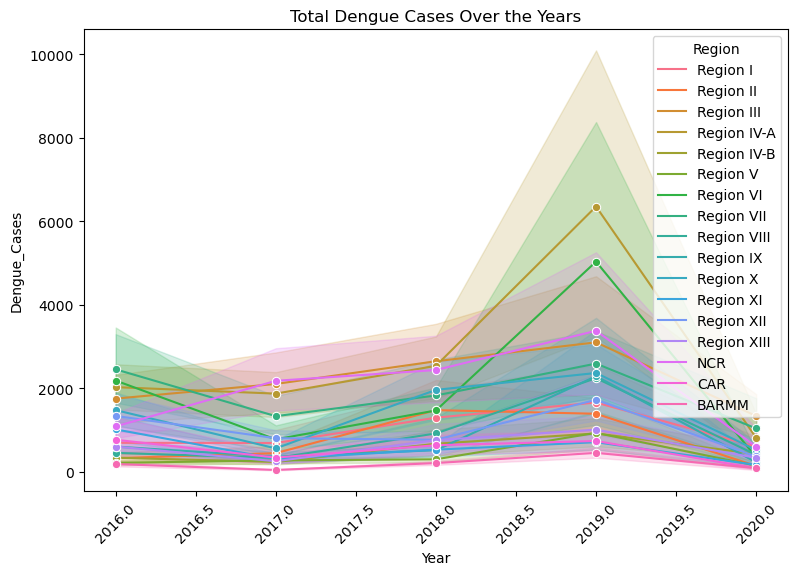

In [214]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=data, x='Year', y='Dengue_Cases', hue='Region', marker='o')
plt.title('Total Dengue Cases Over the Years')
plt.xticks(rotation=45)

In the above visualization, we can see the total dengue cases from 2016 to 2020 across various regions in the Philippines, with a big spike in cases around 2019. This spike is evident in almost all regions, with Regions VII, IX, and IV-A experiencing particularly high case counts during this year. This tells us that there is a potential seasonal pattern, with fluctuations in cases before and after the 2019 spike. This information might be useful for public health officials to design targeted interventions and allocate resources effectively.

c:\Users\den\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\den\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([2015.5, 2016. , 2016.5, 2017. , 2017.5, 2018. , 2018.5, 2019. ,
        2019.5, 2020. , 2020.5]),
 [Text(2015.5, 0, '2015.5'),
  Text(2016.0, 0, '2016.0'),
  Text(2016.5, 0, '2016.5'),
  Text(2017.0, 0, '2017.0'),
  Text(2017.5, 0, '2017.5'),
  Text(2018.0, 0, '2018.0'),
  Text(2018.5, 0, '2018.5'),
  Text(2019.0, 0, '2019.0'),
  Text(2019.5, 0, '2019.5'),
  Text(2020.0, 0, '2020.0'),
  Text(2020.5, 0, '2020.5')])

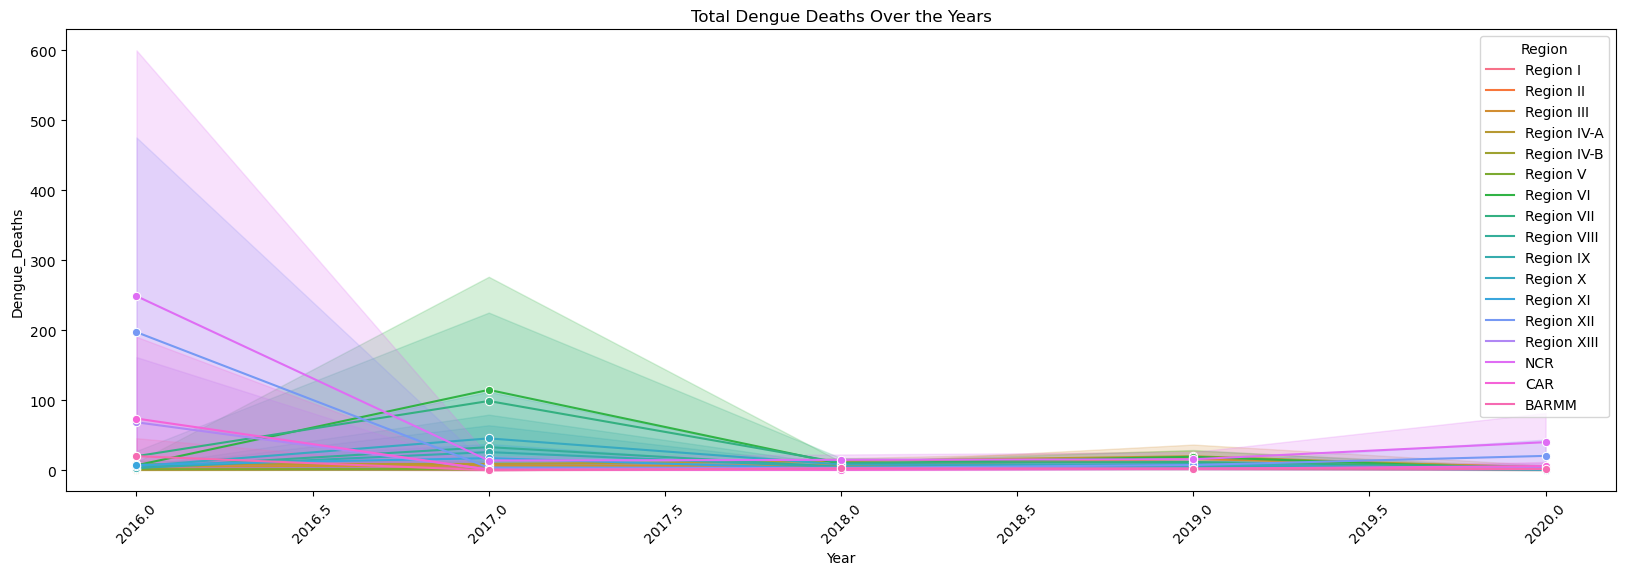

In [215]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=data, x='Year', y='Dengue_Deaths', hue='Region', marker='o')
plt.title('Total Dengue Deaths Over the Years')
plt.xticks(rotation=45)

Now in this visualization we can see that the total dengue deaths in the Philippines is significantly high in the year 2016 but there's a significat flucctuation in the year forward. This graph tells how that Philippines has improved its management of Dengue cases to prevent fatalities.

## Clustering ##

In our model we will be using K-Means clustering to cluster the regions based on dengue cases and deaths.

In [216]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

### Preprocessing ###
We need to preprocess the data before we can perform K-Means clustering to identify the optimal number of clusters. I used label encoder to Region column to tranform the categorical data into numerical data then saving it in a new column Region_Encoded.

In [217]:
label_encoder = LabelEncoder()
data['Region_Encoded'] = label_encoder.fit_transform(data['Region'])

Next is to group the data by Region_Encoded values and then aggregate the dengue cases and deaths. Then we will create a new DataFrame called regional_data which contains the aggregated dengue cases and deaths for each encoded region. This step will make it easier for the algorith to analyze and visualize the data.

In [218]:
regional_data = data.groupby('Region_Encoded').agg({
    'Dengue_Cases': 'sum',
    'Dengue_Deaths': 'sum'
}).reset_index()

Now after creating a new DataFrame, next thing to do is to normalize the data using StandardScaler. We will normalize the columns Dengue_Cases and Dengue_Deaths so that they have a mean of 0 and a standard deviation of 1 , to prevent any one feature from dominating the clustering process.

In [219]:
scaler = StandardScaler()
regional_data_scaled = scaler.fit_transform(regional_data[['Dengue_Cases', 'Dengue_Deaths']])

### K-Means Clustering ###


When I am using K-Means clustering, I am using the Elbow Method to identify the optimal number of clusters.

c:\Users\den\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\den\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\den\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\den\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

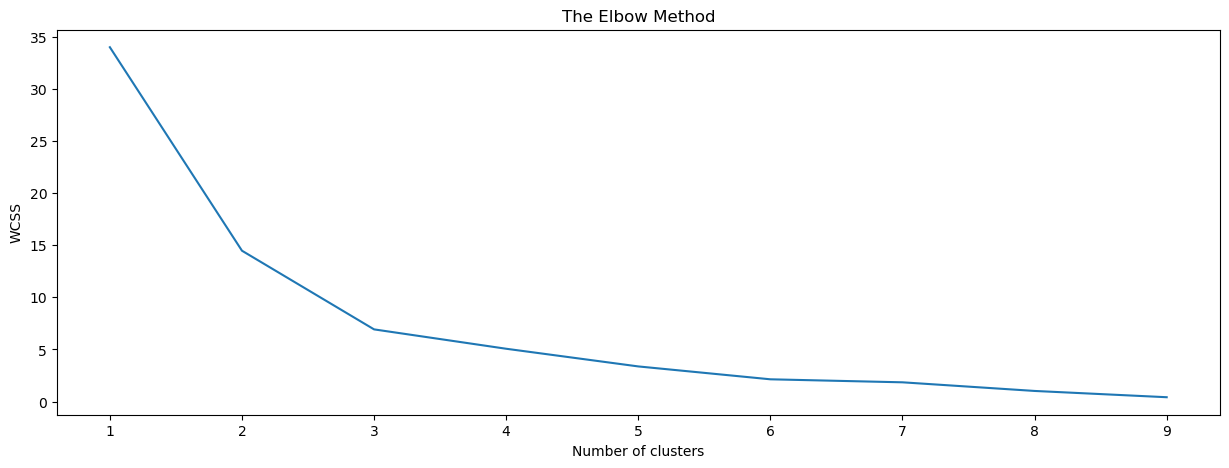

In [254]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init='auto', random_state = 42)
    kmeans.fit(regional_data_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [255]:
wcss

[34.0,
 14.472625026868997,
 6.923500378784258,
 5.064973923311849,
 3.3686867759745875,
 2.1330596749526354,
 1.843823379818258,
 1.0155566349292926,
 0.4133870325105398]

I chose k=3 as the optimal number of clusters based on the Elbow Method, becuase this where you obrserve the most noticable elbow in the graph. Elbow Method is 99% accurate in giving the optimal number to use in K means clustering but we still need to check visually if the clustering is good or not and we can evaluate the performance of the algorithm using the Calinski-Harabasz Index.

In [264]:
kmeans = KMeans(n_clusters=3, random_state=42 ,n_init='auto')
regional_data['Cluster'] = kmeans.fit_predict(regional_data_scaled)

c:\Users\den\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [265]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_score(regional_data[['Dengue_Cases', 'Dengue_Deaths']], regional_data['Cluster'])


24.692041412095485

Here we can see that the Calinski-Harabasz Index is 24.692041412095485 which is pretty good. But let's try another number of clusters which 4 to check if CH Index is better or not.

In [268]:
kmeans = KMeans(n_clusters=4, random_state=42 ,n_init='auto')
regional_data['Cluster'] = kmeans.fit_predict(regional_data_scaled)
calinski_harabasz_score(regional_data[['Dengue_Cases', 'Dengue_Deaths']], regional_data['Cluster'])

c:\Users\den\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


17.471429397721675

In [271]:
kmeans = KMeans(n_clusters=3, random_state=42 ,n_init='auto')
regional_data['Cluster'] = kmeans.fit_predict(regional_data_scaled)

c:\Users\den\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Now we can see that using 4 clusters gives us a lower CH Index so let use 3 clusters again then visualize the data.

In [272]:
cluster_0_rows = regional_data[regional_data['Cluster'] == 0]
cluster_1_rows = regional_data[regional_data['Cluster'] == 1]
cluster_2_rows = regional_data[regional_data['Cluster'] == 2]

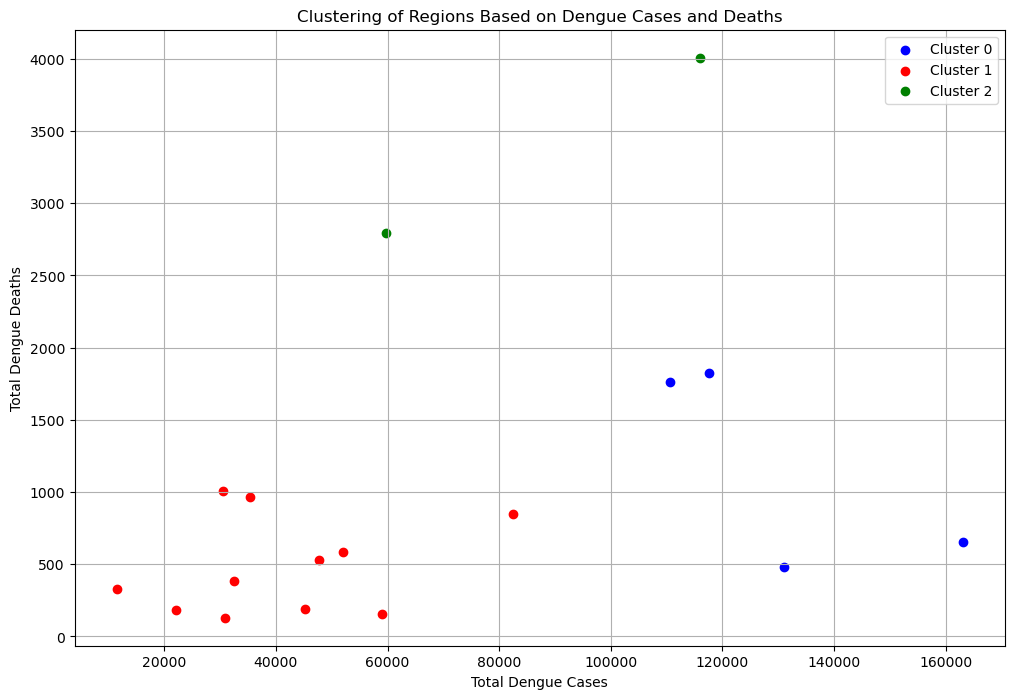

In [273]:
plt.figure(figsize=(12, 8))
plt.scatter(cluster_0_rows['Dengue_Cases'], cluster_0_rows['Dengue_Deaths'], color='blue', label='Cluster 0')
plt.scatter(cluster_1_rows['Dengue_Cases'], cluster_1_rows['Dengue_Deaths'], color='red', label='Cluster 1')
plt.scatter(cluster_2_rows['Dengue_Cases'], cluster_2_rows['Dengue_Deaths'], color='green', label='Cluster 2')
plt.title('Clustering of Regions Based on Dengue Cases and Deaths')
plt.xlabel('Total Dengue Cases')
plt.ylabel('Total Dengue Deaths')
plt.legend()
plt.grid(True)
plt.show()


We can see that using 3 appears to be a good choice, we can see that the cluster are distinct and well separated.This should provide valuable insights for analyzing and addressing dengue cases and deaths across different regions.

After clustering, we can use the label encoder to get the original labels back from the encoded values so we can display which region belongs to which cluster.

In [274]:
regional_data['Region'] = label_encoder.inverse_transform(regional_data['Region_Encoded'])

In [275]:
from IPython.display import display

# Assuming regional_data is already defined
display(regional_data[['Region', 'Dengue_Cases', 'Dengue_Deaths', 'Cluster']])

,Region,Dengue_Cases,Dengue_Deaths,Cluster
0,BARMM,11537,332,1
1,CAR,30582,1008,1
2,NCR,115966,4008,2
3,Region I,59066,157,1
4,Region II,45141,193,1
5,Region III,131064,482,0
6,Region IV-A,163029,652,0
7,Region IV-B,30849,130,1
8,Region IX,47781,532,1
9,Region V,22167,185,1


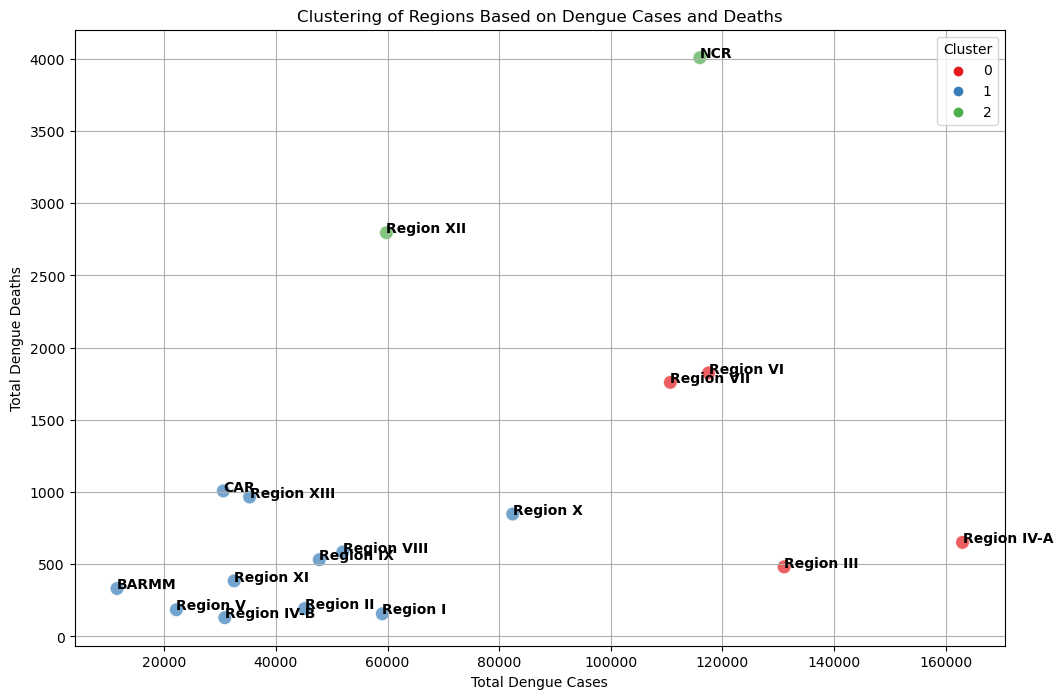

In [276]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=regional_data, x='Dengue_Cases', y='Dengue_Deaths', hue='Cluster', palette='Set1', s=100, alpha=0.7)
for i in range(regional_data.shape[0]):
    plt.text(regional_data['Dengue_Cases'][i], regional_data['Dengue_Deaths'][i], 
             regional_data['Region'][i], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('Clustering of Regions Based on Dengue Cases and Deaths')
plt.xlabel('Total Dengue Cases')
plt.ylabel('Total Dengue Deaths')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Conclusion ##


Now we can see which region belongs to which cluster. Now we can analyze this graph to get insights about the clusters.


### Cluster 0 (red) ###
Includes regions like Region III, Region IV-A, Region VI, and Region VII, which have high dengue cases and deaths


### Cluster 1 (blue) ###

Includes regions such as BARMM, CAR, Region I, Region II, Region IV-B, Region V, Region VIII, Region IX, Region X, Region XI, and Region XIII, with lower dengue cases and deaths.


### Cluster 2 (green) ###

Includes NCR and Region XII, both of which have very high dengue cases and deaths.


### This clustering highlights distinct groupings, suggesting that regions with the highest cases and deaths, particularly those in Cluster 2, require extensive public health measures, while regions in Cluster 1 with lower cases and deaths need consistent monitoring. This visualization will help public health officials in effectively allocating resources and designing targeted interventions to combat dengue in the Years.
